# Seoul Bike Data Project (Part 2)
In the previous notebook we focused on exploratory data analysis and feature engineering. In this part we train various machine learning models, including: 
- XGBoost
- Random forests 
- Neural networks

We use scikit-learn and PyTorch along the way and also look at the importance of various features in our data set based on the output of the aforementioned methods. Let's get started!

In this notebook we will use the packages from Part 1, along with XGBoost and PyTorch. Let's make sure we have these packages before proceeding.

In [76]:
# !pip install xgboost torch
# !pip install joblib


## Model Training and Evaluation

We need to load our processed data from the first notebook. Let's do that right now :)

In [77]:
import pandas as pd
data = pd.read_csv('seoul_processed.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Solar Radiation (MJ/m2)_normalized,Rainfall(mm)_normalized,Snowfall (cm)_normalized,Year,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,-0.655132,-0.1318,-0.171891,2017,1,False,False,True,True,True


Let's start by splitting our data set into training and test sets.

In [78]:
from sklearn.model_selection import train_test_split

# Define features
X = data.drop(['Rented Bike Count', 'Date'], axis=1) # remove 'date' -> encoded in day, month, year

# Also remove continuous vars that are not normalized
continuous_vars = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                       'Visibility (10m)', 'Dew point temperature(°C)', 
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
X = X.drop(continuous_vars, axis = 1)

# Define target variable
y = data['Rented Bike Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's just make sure that we have successfully dropped the non-normalized variables and our response variable:

In [79]:
X_train.head() 

,Hour,Month,Weekday,Temperature(°C)_normalized,Humidity(%)_normalized,Wind speed (m/s)_normalized,Visibility (10m)_normalized,Dew point temperature(°C)_normalized,Solar Radiation (MJ/m2)_normalized,Rainfall(mm)_normalized,Snowfall (cm)_normalized,Year,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
8415,15,11,4,0.026547,0.136227,2.099021,-1.180122,0.132177,0.530553,-0.1318,-0.171891,2018,16,False,False,False,True,True
5049,9,6,4,0.838660,1.364049,-0.024038,-1.477690,1.250127,0.219742,-0.1318,-0.171891,2018,29,False,True,False,True,True
8395,19,11,3,-0.140899,-0.600467,-0.313546,-0.933519,-0.311940,-0.655132,-0.1318,-0.171891,2018,15,False,False,False,True,True
1535,23,2,4,-1.296277,0.529130,0.265470,-0.004646,-0.886229,-0.655132,-0.1318,-0.171891,2018,2,False,False,True,True,True
5518,22,7,2,1.198669,0.725581,-0.217043,-0.709932,1.364985,-0.655132,-0.1318,-0.171891,2018,18,False,True,False,True,True


Let's also check that our variables are in the correct formats (continuous, categorical, etc).

In [80]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 8415 to 7270
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Hour                                  7008 non-null   int64  
 1   Month                                 7008 non-null   int64  
 2   Weekday                               7008 non-null   int64  
 3   Temperature(°C)_normalized            7008 non-null   float64
 4   Humidity(%)_normalized                7008 non-null   float64
 5   Wind speed (m/s)_normalized           7008 non-null   float64
 6   Visibility (10m)_normalized           7008 non-null   float64
 7   Dew point temperature(°C)_normalized  7008 non-null   float64
 8   Solar Radiation (MJ/m2)_normalized    7008 non-null   float64
 9   Rainfall(mm)_normalized               7008 non-null   float64
 10  Snowfall (cm)_normalized              7008 non-null   float64
 11  Year               

From here, we have the option of either converting variables such as `Weekday` and `Day` into categorical variables, or we can keep them as continuous if we suspect certain trends to occur from day to day. For now, we keep them as continuous variables but we can go back and check the analyses if we treat these variables as categorical.

Let's now train our random forest model! Here we will do a vanilla RF without tuning the number of regression tree splits and other parameters and so we don't use cross validation at the moment. Random forests are quite robust to the choice of tuning parameters and so they can serve as a good baseline.

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Train the RF 
rf_model = RandomForestRegressor(n_estimators=500, random_state=3)
rf_model.fit(X_train, y_train)


# Sometimes FutureWarnings are thrown when using mean_squared_error. We can safely ignore these.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Make predictions 
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}')

Random Forest RMSE: 172.611079921699


The root mean squared error (RMSE) for the random forest is displayed above. Before moving on to XGBoost, let's do a quick analysis of the relative feature importance based on the output of our trained random forest.

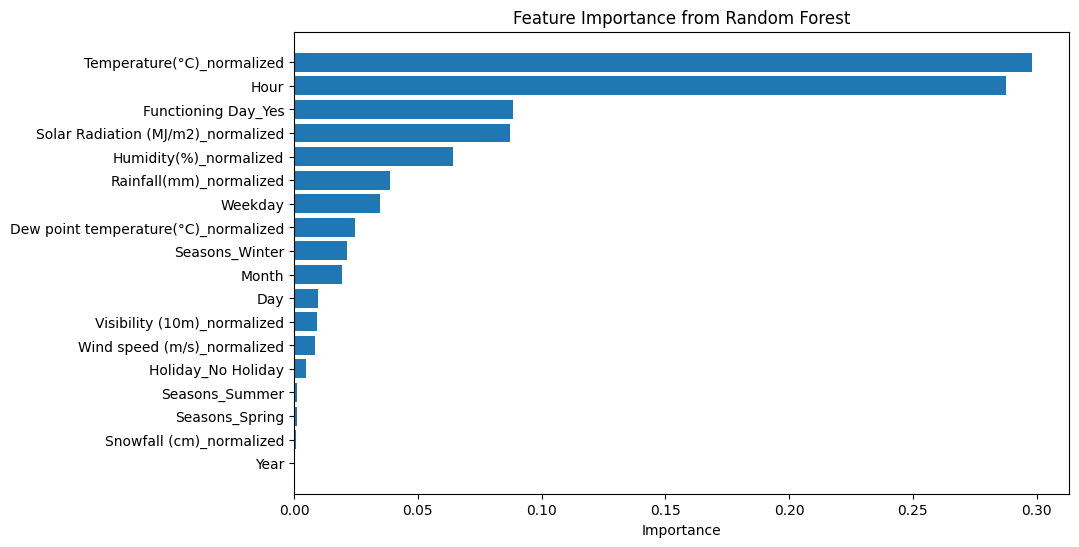

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

As we predicted from Part 1 in our exploratory data analysis, we see that indeed `Temperature` and `Hour` are among the most important predictors! Let's move on to XGBoost.

In [83]:
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=3)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
print(f'XGBoost RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}')

XGBoost RMSE: 150.04288583945865


The RMSE for XGBoost is slightly lower for XGBoost than for the random forest. For XGBoost, tuning the hyperparameters is more important than for the random forest. We could do cross-validation to find potentially optimal sets of hyperparameters (such as the learning rate), but here we just do a quick analysis of the various algorithms at close to default settings. Let's look at the feature importance plot for XGBoost. 

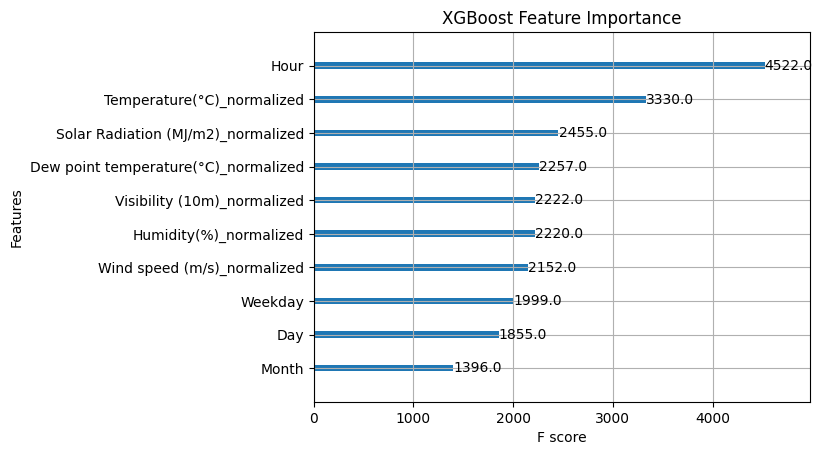

In [84]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()

The results look similar to that of the random forest figure. Let's now use PyTorch to train a neural network and see how this approach performs.
We will use two hidden layers with 64 and 32 neurons each. We also use the ReLU activation function. Again, ideally we would perform a lot of experimentation with different parameter settings (+ cross-validation) for the neural network, but for now we will just do a quick analysis for a neural network initialized at reasonable settings.

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Let's use only numerical features with this NN and drop if not possible
X_train2 = X_train.apply(pd.to_numeric, errors='coerce')
X_test2 = X_test.apply(pd.to_numeric, errors='coerce')
X_train2 = X_train2.fillna(0)
X_test2 = X_test2.fillna(0)
X_train2 = X_train2.astype({col: 'int' for col in X_train2.select_dtypes('bool').columns}) # convert bool to int
X_test2 = X_test2.astype({col: 'int' for col in X_test2.select_dtypes('bool').columns})

X_train_tensor = torch.tensor(X_train2.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) # "-1" automatically reshapes the first coordinate
X_test_tensor = torch.tensor(X_test2.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # use a batch size of 32

# Define NN
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64) # 64 and 32 neurons in the hidden layers
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

Having defined our model, we now train it using the Adam optimizer with reasonable learning rate parameters based on previous work.

In [86]:
# Initialize model, loss function, and optimizer
model = NeuralNet(X_train_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch_group in range(10):
    for epoch in range(50):
        for X_batch, y_batch in train_loader:
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass
            predictions = model(X_batch)
            # Compute loss
            loss = criterion(predictions, y_batch)
            # Backward pass and update weights
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred_nn = model(X_test_tensor).numpy()
        print(f'Neural Network RMSE: {mean_squared_error(y_test_tensor, y_pred_nn, squared=False)}')

Neural Network RMSE: 422.30792236328125
Neural Network RMSE: 428.32537841796875
Neural Network RMSE: 368.7131652832031
Neural Network RMSE: 329.18756103515625
Neural Network RMSE: 332.21136474609375
Neural Network RMSE: 316.8725280761719
Neural Network RMSE: 314.76556396484375
Neural Network RMSE: 315.157958984375
Neural Network RMSE: 291.5444641113281
Neural Network RMSE: 298.4510192871094


We see the training loss going down as we proceed. The current choice of neural network parameters (and Adam parameters) may or may not be optimal. We could have tried different values and use cross validation with the training set instead of the test set, but XGBoost should give fairly reasonable results with minimal tuning effort.


## Deployment

Having chosen the XGBoost model, let's save it and make it ready for deployment!

In [87]:
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

After this stage we can deploy our model. More information coming soon in the (future) third part of our notebook series!